In [1]:
import generalrelativity as gr
import sympy
from pprint import pprint
sympy.init_printing(use_latex=True)

# Introduction 

In this third and last tutorial, we use `generalrelativity` to perform a simulation of black holes by considering the Schwarzschild metric.

# The Schwarzschild metric 

The Schwarzschild metric has two presentations (one in terms of the Schwarzschild radius $R_s$ and the other in terms of its aproximation to $2m$):

$$ g = -\left(1 - \frac{R_s}{r}\right)dt\otimes dt +\left(1 - \frac{R_s}{r}\right)^{-1}dr\otimes dr + r^2d\theta\otimes d\theta + r^2\sin^2(\theta)d\phi\otimes d\phi$$

or, when replacing $R_s = 2mG_n/c^2$ (or, in geometrical units, $R_s = 2m$),

$$ g = -\left(1 - \frac{2mG_n}{c^2r}\right)cdt\otimes cdt +\left(1 - \frac{2mG_n}{c^2r}\right)^{-1}dr\otimes dr + r^2d\theta\otimes d\theta + r^2\sin^2(\theta)d\phi\otimes d\phi$$

Lets create the metric in `generalrelativity`.

In [2]:
t, r, theta, phi = sympy.symbols('t r \\theta \\phi')
m, Gn, c, Rs = sympy.symbols('m G_n c R_s', float=True)

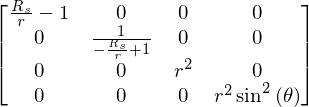

In [3]:
g_matrix = sympy.diag(
    -(1-Rs/r),
    1/(1-Rs/r),
    r**2,
    r**2*sympy.sin(theta)**2
)
g_matrix

In [4]:
g = gr.get_tensor_from_matrix(g_matrix, [t, r, theta, phi])
g

(r**2)\theta* \otimes \theta* + (r/(-R_s + r))r* \otimes r* + ((R_s - r)/r)t* \otimes t* + (r**2*sin(\theta)**2)\phi* \otimes \phi*

In [5]:
other_g = g.subs([(Rs, 2*Gn*m/c**2)])
other_g

(r**2)\theta* \otimes \theta* + (c**2*r/(-2*G_n*m + c**2*r))r* \otimes r* + (2*G_n*m/(c**2*r) - 1)t* \otimes t* + (r**2*sin(\theta)**2)\phi* \otimes \phi*

## Schwarzschild spacetime

`generalrelativity` comes with an object called `Spacetime`, which holds the essential tensors that one can get from a metric $g$. The syntax is just

```python
M = gr.Spacetime(metric)
```

For example, let's create a spacetime object with Schwarzschild's metric:

In [6]:
M = gr.Spacetime(other_g)

Computing Christoffel Symbols
Computing Riemann tensor
Computing Ricci tensor
Computing Scalar Curvature
Computing Einstein's tensor


Among the assumptions that are made to derive Schwarzschild metric, is that it represents a *Ricci flat* spacetime (i.e. $Ric = 0$). Let's verify that this is true:

In [7]:
M.Ric

0

In [8]:
pprint(M.christoffel_symbols.values)

{((0,), (0, 1)): -1.0*G_n*m/(r*(2*G_n*m - c**2*r)),
 ((0,), (1, 0)): -1.0*G_n*m/(r*(2*G_n*m - c**2*r)),
 ((1,), (0, 0)): -1.0*G_n*m*(2*G_n*m - c**2*r)/(c**4*r**3),
 ((1,), (1, 1)): G_n*m/(r*(2*G_n*m - c**2*r)),
 ((1,), (2, 2)): 2.0*G_n*m/c**2 - 1.0*r,
 ((1,), (3, 3)): (2.0*G_n*m - 1.0*c**2*r)*sin(\theta)**2/c**2,
 ((2,), (1, 2)): 1.0/r,
 ((2,), (2, 1)): 1.0/r,
 ((2,), (3, 3)): -0.5*sin(2*\theta),
 ((3,), (1, 3)): 1.0/r,
 ((3,), (2, 3)): 1.0/tan(\theta),
 ((3,), (3, 1)): 1.0/r,
 ((3,), (3, 2)): 1.0/tan(\theta)}
